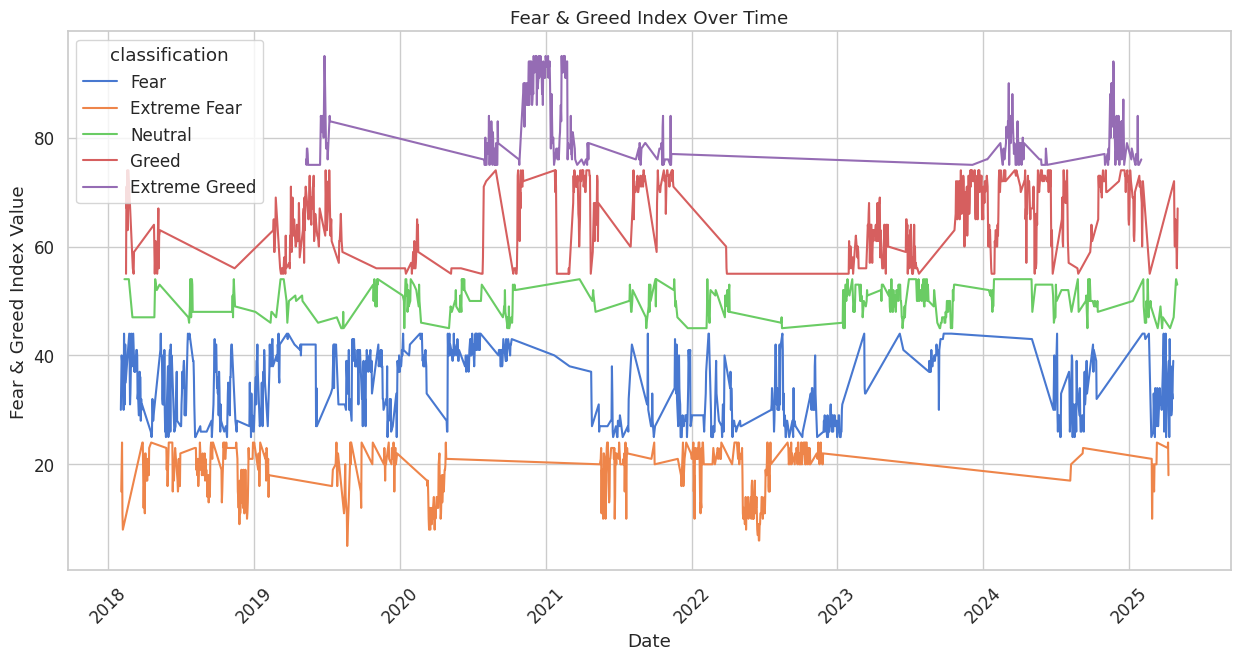

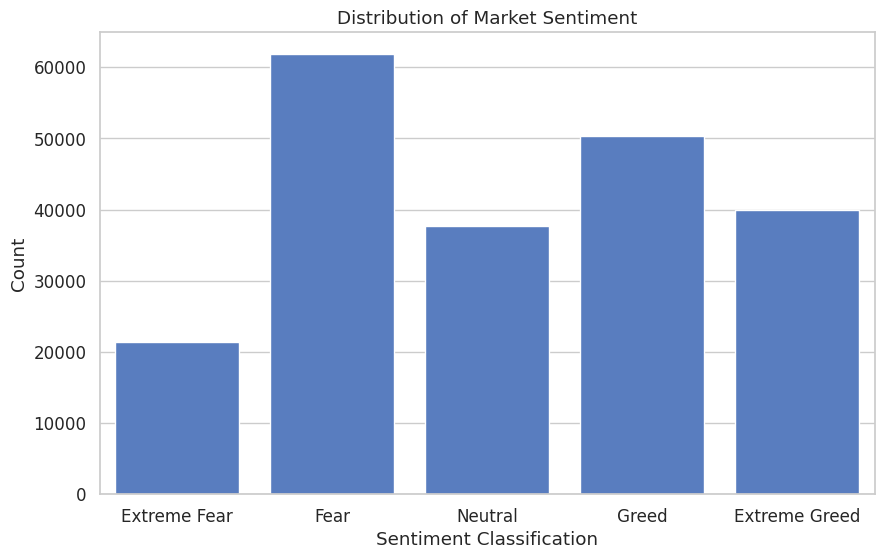

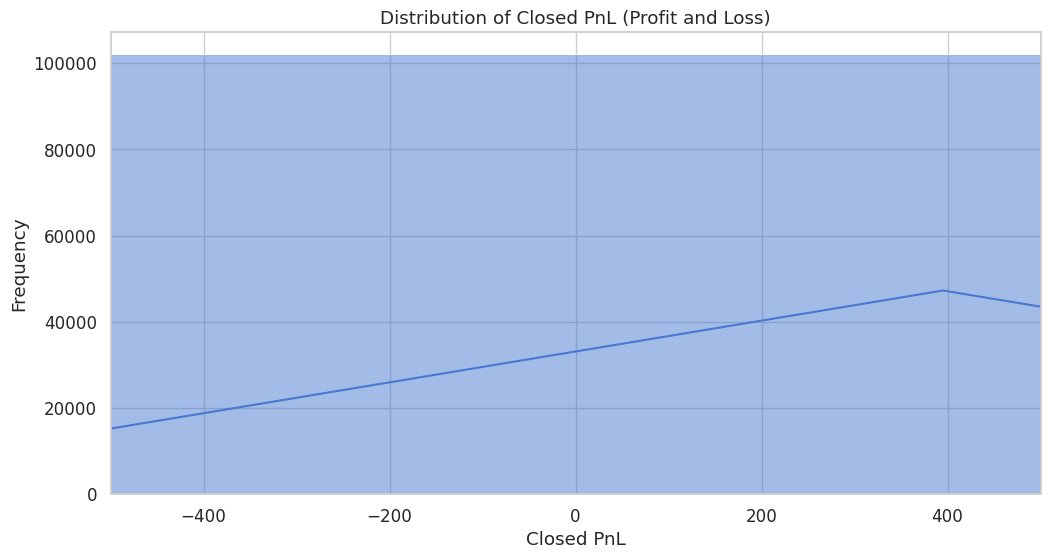

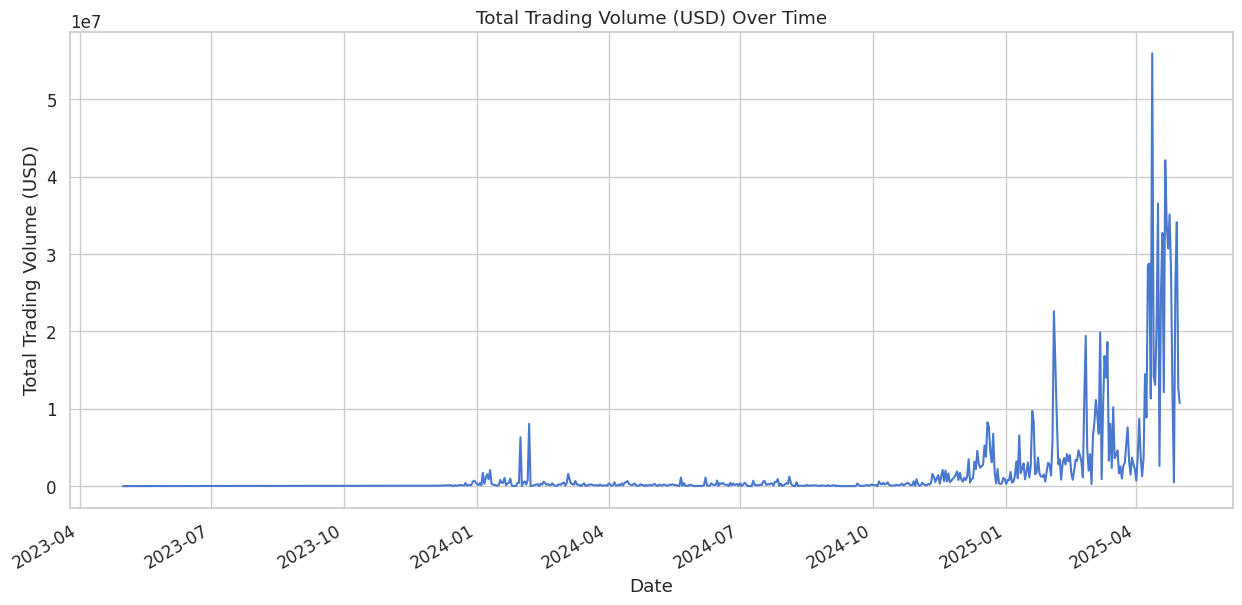

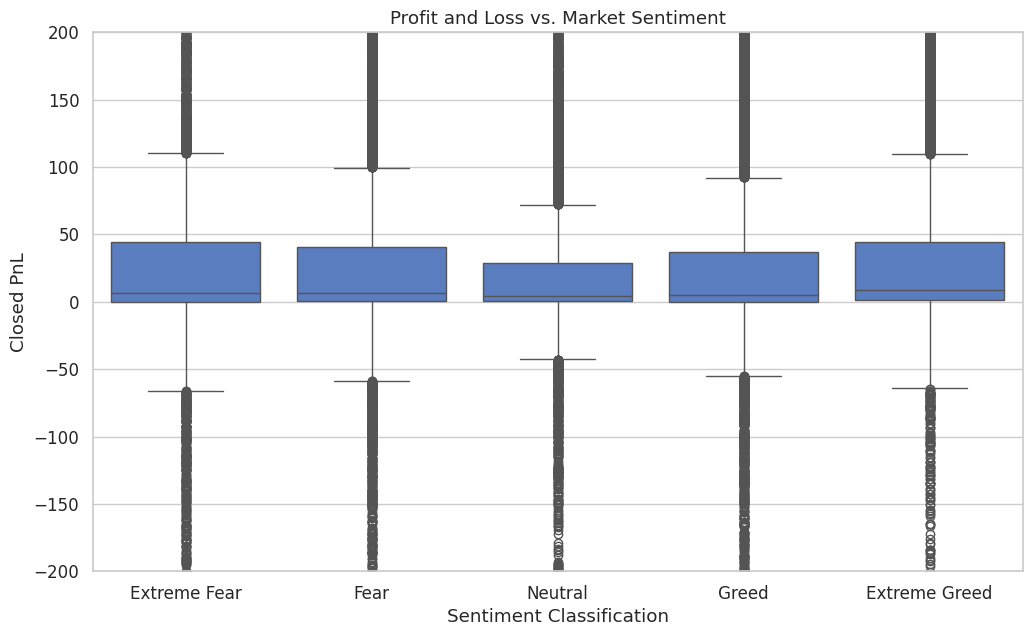

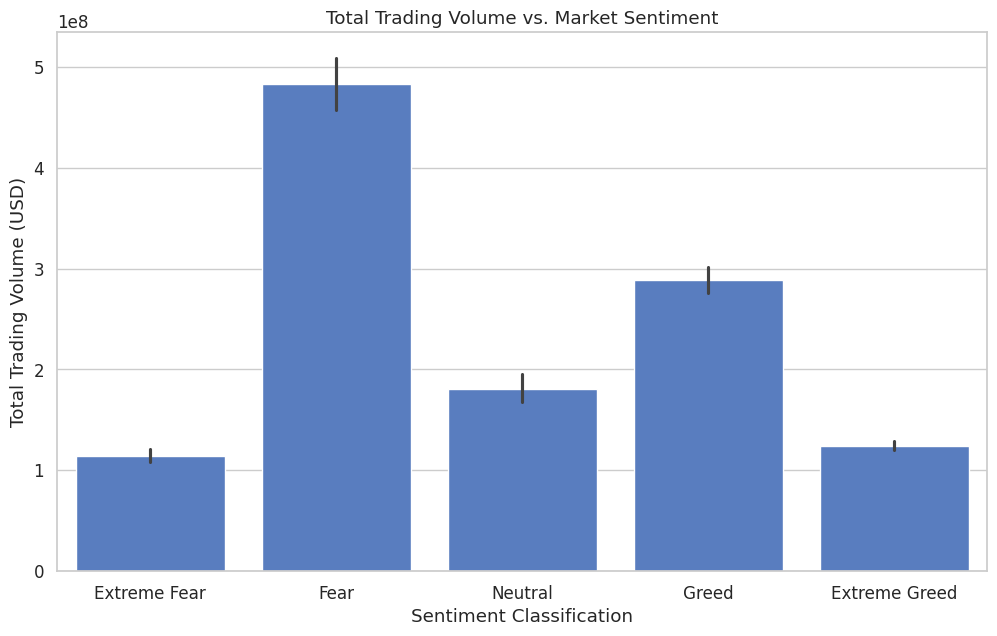

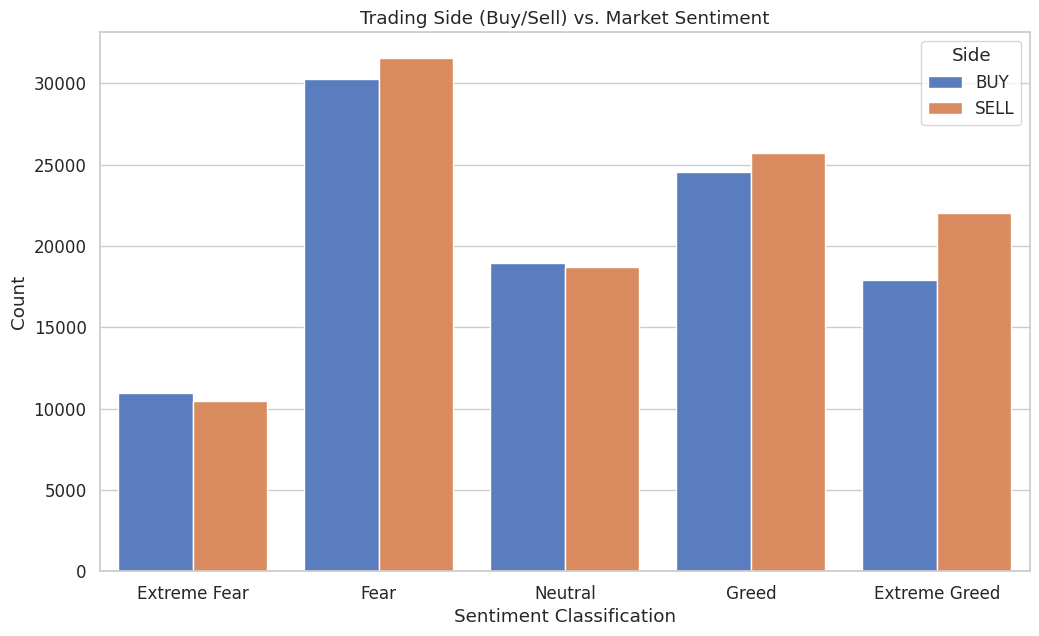


Analysis complete.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_show_plots():
    """
    Analyzes the relationship between trader behavior and market sentiment
    and displays the visualizations directly.

    This function performs the following steps:
    1. Loads the historical trading data and Fear & Greed Index data.
    2. Preprocesses the data by converting timestamps and creating a common date column.
    3. Merges the two datasets.
    4. Generates and displays a series of visualizations to explore the relationships.
    """
    # --- 1. Load Datasets ---
    fear_greed_df = pd.read_csv('fear_greed_index.csv')
    historical_df = pd.read_csv('historical_data.csv')

    # --- 2. Preprocess Data ---

    # Preprocessing Fear & Greed Data
    fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

    # Preprocessing Historical Trading Data
    historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], errors='coerce', dayfirst=True)
    historical_df.dropna(subset=['Timestamp IST'], inplace=True)
    historical_df['date'] = historical_df['Timestamp IST'].dt.date
    historical_df['date'] = pd.to_datetime(historical_df['date'])

    # --- 3. Merge Datasets ---
    merged_df = pd.merge(historical_df, fear_greed_df, on='date', how='left')
    merged_df.dropna(subset=['classification'], inplace=True)

    # --- 4. EDA and Visualization ---

    # -- Sentiment Analysis --
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=fear_greed_df, x='date', y='value', hue='classification')
    plt.title('Fear & Greed Index Over Time')
    plt.xlabel('Date')
    plt.ylabel('Fear & Greed Index Value')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_df, x='classification', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
    plt.title('Distribution of Market Sentiment')
    plt.xlabel('Sentiment Classification')
    plt.ylabel('Count')
    plt.show()

    # -- Trader Behavior Analysis --
    pnl_df = merged_df[merged_df['Closed PnL'] != 0].copy()
    plt.figure(figsize=(12, 6))
    sns.histplot(pnl_df['Closed PnL'], bins=100, kde=True)
    plt.title('Distribution of Closed PnL (Profit and Loss)')
    plt.xlabel('Closed PnL')
    plt.ylabel('Frequency')
    plt.xlim(-500, 500)
    plt.show()

    plt.figure(figsize=(15, 7))
    merged_df.groupby('date')['Size USD'].sum().plot()
    plt.title('Total Trading Volume (USD) Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Trading Volume (USD)')
    plt.grid(True)
    plt.show()

    # -- Combined Analysis: Trader Behavior vs. Market Sentiment --

    # Profitability vs. Sentiment
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=pnl_df, x='classification', y='Closed PnL', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
    plt.title('Profit and Loss vs. Market Sentiment')
    plt.xlabel('Sentiment Classification')
    plt.ylabel('Closed PnL')
    plt.ylim(-200, 200)
    plt.show()

    # Trading Volume vs. Sentiment
    plt.figure(figsize=(12, 7))
    sns.barplot(data=merged_df, x='classification', y='Size USD', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], estimator=sum)
    plt.title('Total Trading Volume vs. Market Sentiment')
    plt.xlabel('Sentiment Classification')
    plt.ylabel('Total Trading Volume (USD)')
    plt.show()

    # Trading Side (Buy/Sell) vs. Sentiment
    plt.figure(figsize=(12, 7))
    sns.countplot(data=merged_df, x='classification', hue='Side', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
    plt.title('Trading Side (Buy/Sell) vs. Market Sentiment')
    plt.xlabel('Sentiment Classification')
    plt.ylabel('Count')
    plt.show()

    print("\nAnalysis complete.")

if __name__ == '__main__':
    analyze_and_show_plots()